In [528]:
import torch
import plotly.express as px
from sklearn.decomposition import PCA

In [529]:
toolnames = torch.load('toolnames.pt')
# categories = torch.load('categories.pt')
corpus_embeddings = torch.load('corpus_embeddings.pt')

/tmp/ipykernel_2070320/1873476236.py:1: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

/tmp/ipykernel_2070320/1873476236.py:3: FutureWarning:

You are using `torch.load` with

In [530]:
corpus_embeddings.shape, len(toolnames)

(torch.Size([58, 1024]), 58)

In [531]:
for i in range(len(toolnames)):
    if toolnames[i] == "chat":
        chat_index = i

In [532]:
corpus_embeddings = torch.concatenate((corpus_embeddings[:chat_index], corpus_embeddings[chat_index+1:]), 0)
toolnames = toolnames[:chat_index] + toolnames[chat_index+1:]

In [533]:
corpus_embeddings.shape, len(toolnames)

(torch.Size([57, 1024]), 57)

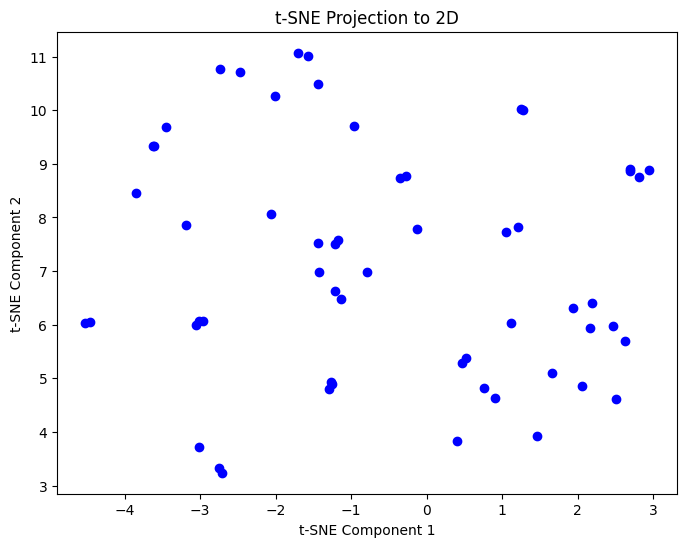

In [534]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 假设 corpus_embeddings 是你的数据，转换为 numpy 数组
tensor_np = corpus_embeddings.cpu().numpy()

# 标准化数据
scaler = StandardScaler()
tensor_np = scaler.fit_transform(tensor_np)

# 使用t-SNE将数据降维到二维或三维
tsne = TSNE(n_components=2, random_state=17)  # 这里将数据降到二维
tensor_2d = tsne.fit_transform(tensor_np)

# 可视化t-SNE降维结果
plt.figure(figsize=(8, 6))
plt.scatter(tensor_2d[:, 0], tensor_2d[:, 1], c='b', marker='o')
plt.title('t-SNE Projection to 2D')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [535]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA  # 导入PCA
# import matplotlib.pyplot as plt

# # 假设 corpus_embeddings 是你的数据，转换为 numpy 数组
# tensor_np = corpus_embeddings.cpu().numpy()

# # 标准化数据
# scaler = StandardScaler()
# tensor_np = scaler.fit_transform(tensor_np)

# # 使用PCA将数据降维到二维
# pca = PCA(n_components=2)  # 这里将数据降到二维
# tensor_2d = pca.fit_transform(tensor_np)

# # 可视化PCA降维结果
# plt.figure(figsize=(8, 6))
# plt.scatter(tensor_2d[:, 0], tensor_2d[:, 1], c='b', marker='o')
# plt.title('PCA Projection to 2D')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.show()


In [536]:
tool_types ={
    "Function": [
            "saprot_regression",
            "saprot_mutation",
            "saprot_pair_regression",
            "saprot_pair_classification",
            "saprot_classification",
            "saprot_token_classification",
            "saprot_pair_classification",
            "saprot_tune_regression",
            "saprot_tune_pair_regression",
            "saprot_tune_classification",
            "saprot_tune_token_classification",
            "saprot_tune_pair_classification",
            "saprot_tuned_inference_classification",
            "saprot_tuned_inference_regression",
            "saprot_tuned_inference_pair_classification",
            "saprot_tuned_inference_pair_regression",
            "saprot_tuned_inference_token_classification",
        ],
    "Structure": [
            "alphafold2",
            "esmfold",
            "foldseek",
            "tmalign",
            "umol"
        ],
    "Design": [
            "rfdiffusion_binder_design",
            "rfdiffusion_motif_scaffolding",
            "rfdiffusion_partial_diffusion",
            "rfdiffusion",
            "rfdiffusion_conditional_fold_generation",
            "proteinmpnn",
            "pinal",
            "deepab",
            "diffab_design",
            "diffab_optimize"
        ],
    # "Design(Struct)": [
    #         "rfdiffusion_binder_design",
    #         "rfdiffusion_motif_scaffolding",
    #         "rfdiffusion_partial_diffusion",
    #         "rfdiffusion",
    #         "rfdiffusion_conditional_fold_generation",
    #         "proteinmpnn",
    #         "pinal",
    #         "deepab",
    #         "diffab_design",
    #         "diffab_optimize",
    #         "umol"
    #     ],
    # "Design(Seq)": [
    #         "rfdiffusion_binder_design",
    #         "rfdiffusion_motif_scaffolding",
    #         "rfdiffusion_partial_diffusion",
    #         "rfdiffusion",
    #         "rfdiffusion_conditional_fold_generation",
    #         "proteinmpnn",
    #         "pinal",
    #         "deepab",
    #         "diffab_design",
    #         "diffab_optimize",
    #         "umol"
    #     ],
    
    "Knowledge": [
            "wikipedia",
            "pfam_entry",
            "pfam_match",
            "biorxiv",
            "pubmed",
            "uniprot_fetch_sequence",
            "uniprot_fetch_structure",
            "uniprot_fetch_subsection"
        ],
    "Sequence": [
            "blast",
            "mmseqs_cluster",
            "mmseqs_group",
            "mmseqs_search",
            "hhsearch",
            "hhfilter",
            "hhblits",
            "hhmake",
            "hmmsearch",
            "clustalw",
            "hhalign"
        ],
    "Multimodal": [
            "protrek_protein2text",
            "protrek_text2protein",
            "protrek_text2structure",
            "protrek_protein2structure",
            "protrek_structure2protein",
            "protrek_structure2text",
            "protrek_protein2protein",
            "protrek_structure2structure",
            "protrek_text2text",
            "evolla_chat_byid",
            "evolla_chat_byseq",
            "evolla_chat_bystruct"
        ]
}

In [537]:
def find_tool_type(toolname):
    for tool_type in tool_types.keys():
        if toolname.strip() in tool_types[tool_type]:
            return tool_type
    return "unknown"

In [538]:
toolnames

['alphafold2',
 'biorxiv',
 'blast',
 'clustalw',
 'diffab_design',
 'diffab_optimize',
 'esmfold',
 'evolla_chat_byid',
 'evolla_chat_byseq',
 'evolla_chat_bystruct',
 'foldseek',
 'hmmsearch',
 'hhalign',
 'hhblits',
 'hhfilter',
 'hhmake',
 'hhsearch',
 'mmseqs_cluster',
 'mmseqs_group',
 'mmseqs_search',
 'pfam_entry',
 'pfam_match',
 'pinal',
 'proteinmpnn',
 'protrek_protein2protein',
 'protrek_protein2structure',
 'protrek_protein2text',
 'protrek_structure2protein',
 'protrek_structure2structure',
 'protrek_structure2text',
 'protrek_text2text',
 'pubmed',
 'rfdiffusion_binder_design',
 'rfdiffusion_motif_scaffolding',
 'rfdiffusion_partial_diffusion',
 'rfdiffusion',
 'saprot_classification',
 'saprot_tuned_inference_classification',
 'saprot_tuned_inference_regression',
 'saprot_tuned_inference_token_classification',
 'saprot_mutation',
 'saprot_pair_classification',
 'saprot_pair_regression',
 'saprot_tuned_inference_pair_classification',
 'saprot_tuned_inference_pair_regres

In [539]:
short_names = ['AlphaFold2',
 'BioRxiv',
 'Blast',
 'ClustalW',
 'Diffab',
 'Diffab',
 'ESMFold',
 'Evolla',
 'Evolla',
 'Evolla',
 'FoldSeek',
 'HMMSearch',
 'HHAlgin',
 'HHBlits',
 'HHFilter',
 'HHMake',
 'HHSearch',
 'MMseqs',
 'MMseqs',
 'MMseqs',
 'Pfam',
 'Pfam',
 'Pinal',
 'ProteinMPNN',
 'ProTrek',
 'ProTrek',
 'ProTrek',
 'ProTrek',
 'ProTrek',
 'ProTrek',
 'ProTrek',
 'PubMed',
 'RFDiffusion',
 'RFDiffusion',
 'RFDiffusion',
 'RFDiffusion',
 'SaProt',
 'SaProt',
 'SaProt',
 'SaProt',
 'SaProt',
 'SaProt',
 'SaProt',
 'SaProt',
 'SaProt',
 'SaProt',
 'SaProt',
 'SaProt',
 'SaProt',
 'SaProt',
 'SaProt',
 'TMAlign',
 'Umol',
 'UniProt',
 'UniProt',
 'UniProt',
 'wikipedia']

In [540]:
groups = [find_tool_type(toolname) for toolname in toolnames]
groups

['Structure',
 'Knowledge',
 'Sequence',
 'Sequence',
 'Design',
 'Design',
 'Structure',
 'Multimodal',
 'Multimodal',
 'Multimodal',
 'Structure',
 'Sequence',
 'Sequence',
 'Sequence',
 'Sequence',
 'Sequence',
 'Sequence',
 'Sequence',
 'Sequence',
 'Sequence',
 'Knowledge',
 'Knowledge',
 'Design',
 'Design',
 'Multimodal',
 'Multimodal',
 'Multimodal',
 'Multimodal',
 'Multimodal',
 'Multimodal',
 'Multimodal',
 'Knowledge',
 'Design',
 'Design',
 'Design',
 'Design',
 'Function',
 'Function',
 'Function',
 'Function',
 'Function',
 'Function',
 'Function',
 'Function',
 'Function',
 'Function',
 'Function',
 'Function',
 'Function',
 'Function',
 'Function',
 'Structure',
 'Structure',
 'Knowledge',
 'Knowledge',
 'Knowledge',
 'Knowledge']

In [541]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from scipy.spatial import ConvexHull

# 假设 tensor_2d 是点的坐标，groups 是点的分组
points = tensor_2d
categories = groups  # 这包含 'Search', 'Design', 等类别标签

# 创建一个类别到索引的映射
unique_categories = list(set(categories))
category_to_idx = {category: idx for idx, category in enumerate(unique_categories)}

# 初始化 Plotly 图形
fig = go.Figure()

# 获取类别的颜色
color_scale = px.colors.sequential.Viridis  # 选择一个颜色调色板

# 遍历每个类别
for category in unique_categories:
    # 获取属于该类别的点
    category_points = points[np.array(categories) == category]

    if len(category_points) == 2:
        # 如果类别只有两个点，绘制一条连接它们的线
        category_idx = category_to_idx[category]
        color = color_scale[category_idx % len(color_scale)]

        # 绘制连接两点的线
        fig.add_trace(go.Scatter(
            x=category_points[:, 0], y=category_points[:, 1],
            mode='lines+markers',  # 线和点
            marker=dict(size=8, color=color, opacity=0.6),
            name=category,  # 添加类别标签
            showlegend=True,  # 显示图例
        ))
        continue  # 跳过后续的凸包计算

    if len(category_points) < 3:
        # 对于没有凸包的类别且点数少于3个，可以直接添加到图例
        category_idx = category_to_idx[category]
        color = color_scale[category_idx % len(color_scale)]

        # 添加没有凸包的点到图例
        fig.add_trace(go.Scatter(
            x=category_points[:, 0], y=category_points[:, 1],
            mode='markers',  # 只显示点
            marker=dict(size=8, color=color, opacity=0.6),
            name=category,  # 添加类别标签
            showlegend=True,  # 显示图例
        ))
        continue  # 跳过没有凸包的点的凸包计算

    # 计算该类别点的凸包
    hull = ConvexHull(category_points)
    hull_points = category_points[hull.vertices]

    # 使用 category_to_idx 获取类别的数值索引
    category_idx = category_to_idx[category]
    
    # 使用颜色调色板选择颜色
    color = color_scale[category_idx % len(color_scale)]
    
    fill_color = f"rgba{tuple(px.colors.hex_to_rgb(color)) + (0.3,)}"  # 更低的透明度

    # 创建该类别的光滑闭合图形
    # 创建该类别的光滑闭合图形，但不绘制边界点
    fig.add_trace(go.Scatter(
        x=hull_points[:, 0], y=hull_points[:, 1],
        fill='toself',
        fillcolor=fill_color,  # 使用选定的颜色
        line=dict(width=0),  # 不绘制边界线
        showlegend=True,  # 显示图例
        name=category,  # 添加类别标签
        marker=dict(size=8, color=color, colorscale='Viridis', opacity=0.6), # 确保填充颜色统一
    ))

# 将每个点的类别转换为数值索引
numeric_colors = [category_to_idx[category] for category in categories]

# 添加点的散点图，并且隐藏图例
fig.add_trace(go.Scatter(
    x=points[:, 0], y=points[:, 1],
    mode='markers+text',
    marker=dict(
        size=8,
        color=[color_scale[category_to_idx[category] % len(color_scale)] for category in categories],  # 统一颜色映射
        colorscale='Viridis',
        opacity=0.6
    ),
    text=short_names,
    textposition='bottom center',
    textfont=dict(size=12),
    hoverinfo='text',
    showlegend=False
))

# 去掉轴和背景，并调整图像的纵横比
fig.update_layout(
    xaxis_visible=False,
    yaxis_visible=False,
    plot_bgcolor='rgba(0, 0, 0, 0)',  # 去掉背景颜色
    paper_bgcolor='rgba(0, 0, 0, 0)',  # 去掉纸张背景颜色
    autosize=True,  # 自动调整大小
    height=600,  # 增大高度
    width=800,   # 减小宽度
)

# 让x轴从右往左
# fig.update_xaxes(autorange='reversed')

# 显示图形
fig.show()

# 保存图形到svg
fig.write_image("output.svg")
